In [109]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math 

# Have ChatGPT generate a random dataset
# Generate features: time of day (0-23), day of the week (0-Monday to 6-Sunday)
np.random.seed(42)  # For reproducibility

days_of_week = 7
hours_per_day = 24

# Create x_train with random time of day values while ensuring 168 total entries
x_train = []
for day in range(days_of_week):
    for _ in range(hours_per_day):
        hour = np.random.randint(0, hours_per_day)  # Random hour
        x_train.append([hour, day])

x_train = np.array(x_train)

# Target: number of people in bathroom
y_train = np.array([
    # Monday: low attendance
    0, 0, 1, 1, 2, 2, 3, 4, 5, 5,  # Morning
    5, 6, 7, 8, 7, 6, 5, 4, 3, 2,  # Afternoon
    2, 2, 1, 1,                  # Late Night
    # Tuesday: slightly increased
    0, 1, 2, 3, 3, 4, 5, 6, 7, 8,
    8, 9, 10, 9, 8, 7, 6, 5, 4, 3,
    2, 2, 2, 1,
    # Wednesday: similar to Tuesday
    0, 1, 2, 3, 3, 4, 5, 6, 7, 8,
    8, 9, 10, 9, 8, 7, 6, 5, 4, 3,
    2, 2, 2, 1,
    # Thursday: peaks before weekend
    1, 2, 3, 4, 4, 5, 6, 7, 8, 9,
    9, 10, 11, 10, 9, 8, 7, 6, 5, 4,
    3, 2, 2, 1,
    # Friday: high attendance
    1, 2, 3, 5, 6, 8, 10, 12, 14, 16,
    18, 20, 22, 22, 20, 18, 15, 12, 10, 8,
    6, 4, 3, 2,
    # Saturday: peak attendance
    2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
    22, 24, 24, 22, 20, 18, 16, 14, 12, 10,
    8, 6, 4, 2,
    # Sunday: high in the morning, taper off at night
    3, 5, 7, 9, 10, 8, 6, 5, 4, 3,
    2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 0, 0,
])


y_train = y_train.ravel()
print("Shape of x_train:", x_train.shape)  
print("Shape of y_train:", y_train.shape)  

print(f"First five entries of x_train: \n{x_train[0:5]}")

Shape of x_train: (168, 2)
Shape of y_train: (168,)
First five entries of x_train: 
[[ 6  0]
 [19  0]
 [14  0]
 [10  0]
 [ 7  0]]


In [110]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate features: time of day (0-23), day of the week (0-Monday to 6-Sunday)
days_of_week = 7
hours_per_day = 24

# Create x_train with structured time of day values while ensuring 168 total entries
x_train = []
for day in range(days_of_week):
    for hour in range(hours_per_day):
        x_train.append([hour, day])

x_train = np.array(x_train)

# Define target: number of people in bathroom
y_train = []

# Define attendance patterns based on the day of the week
for hour, day in x_train:
    base_attendance = 0
    if day == 0:  # Monday
        base_attendance = 2 + hour // 3
    elif day == 1:  # Tuesday
        base_attendance = 3 + hour // 3
    elif day == 2:  # Wednesday
        base_attendance = 4 + hour // 3
    elif day == 3:  # Thursday
        base_attendance = 5 + hour // 3
    elif day == 4:  # Friday
        base_attendance = 6 + hour // 2
    elif day == 5:  # Saturday
        base_attendance = 8 + hour // 2
    elif day == 6:  # Sunday
        base_attendance = 3 + hour // 3

    # Adding random noise to simulate variability
    noise = np.random.randint(-2, 3)  # Random noise in the range of -2 to 2
    y_train.append(max(0, base_attendance + noise))  # Ensure non-negative attendance

# Convert to numpy array
y_train = np.array(y_train)

# Ensure the shapes are correct
print("X shape:", x_train.shape)  # Should be (168, 2)
print("Y shape:", y_train.shape)  # Should be (168,)


X shape: (168, 2)
Y shape: (168,)


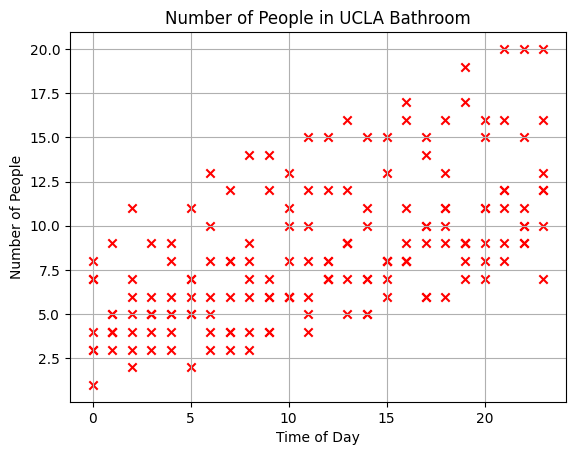

In [111]:
time_of_day = x_train[:, 0]
plt.scatter(time_of_day, y_train, marker='x', c='r')
plt.title("Number of People in UCLA Bathroom")
plt.ylabel('Number of People')
plt.xlabel('Time of Day')
plt.grid()  
plt.show()

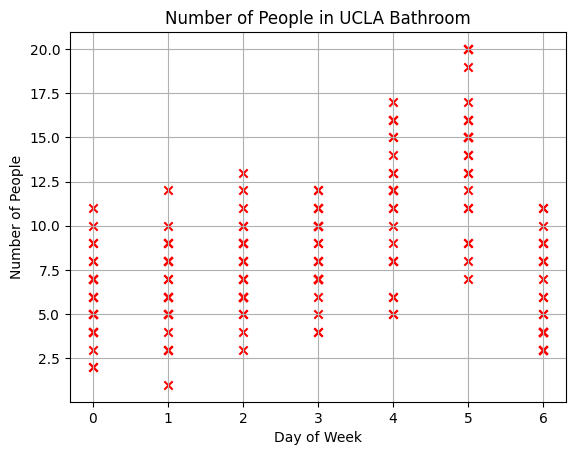

In [112]:
days_of_week = x_train[:, 1]
plt.scatter(days_of_week, y_train, marker='x', c='r')
plt.title("Number of People in UCLA Bathroom")
plt.ylabel('Number of People')
plt.xlabel('Day of Week')
plt.grid()  
plt.show()

In [113]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    total_cost = 0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = (f_wb - y[i]) ** 2
        total_cost += cost
    
    return total_cost / (2 * m)
    
    

In [114]:
# Test
w = np.array([0.5, -1.0])  
b = 1.5                    

cost = compute_cost(x_train, y_train, w, b)
print("Cost:", cost)

Cost: 19.74702380952381


In [115]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0
    
    for i in range(m):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        dj_db += err
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [116]:
# Test

initial_w = np.zeros(x_train.shape[1])
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at test w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b (zeros): [-115.36904762  -28.50595238] -8.56547619047619


In [117]:
def gradient_descent(x, y, w_init, b_init, cost_function, gradient_function, alpha, iter):
    m = x.shape[0] 
    J_history = []
    w_history = []
    w = copy.deepcopy(w_init)  
    b = b_init
    
    for i in range(iter):
        dj_dw, dj_db = gradient_function(x_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000:     
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(iter/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 


In [121]:
initial_w = np.zeros(x_train.shape[1])
initial_w = np.random.randn(2)
initial_b = 0

iterations = 10000
alpha = 0.001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   108.08   
Iteration 1000: Cost     4.46   
Iteration 2000: Cost     4.36   
Iteration 3000: Cost     4.29   
Iteration 4000: Cost     4.24   
Iteration 5000: Cost     4.21   
Iteration 6000: Cost     4.18   
Iteration 7000: Cost     4.16   
Iteration 8000: Cost     4.15   
Iteration 9000: Cost     4.14   
w,b found by gradient descent: [0.37045311 0.76234   ] 1.9415682146486788


In [122]:
prediction = np.dot(x_train, w) + b
rounded_predictions = np.round(prediction)

correct_predictions = np.sum(rounded_predictions == y_train.flatten())
percentage_similarity = (correct_predictions / len(y_train)) * 100

print("Percentage Similarity:", percentage_similarity)

Percentage Similarity: 14.880952380952381


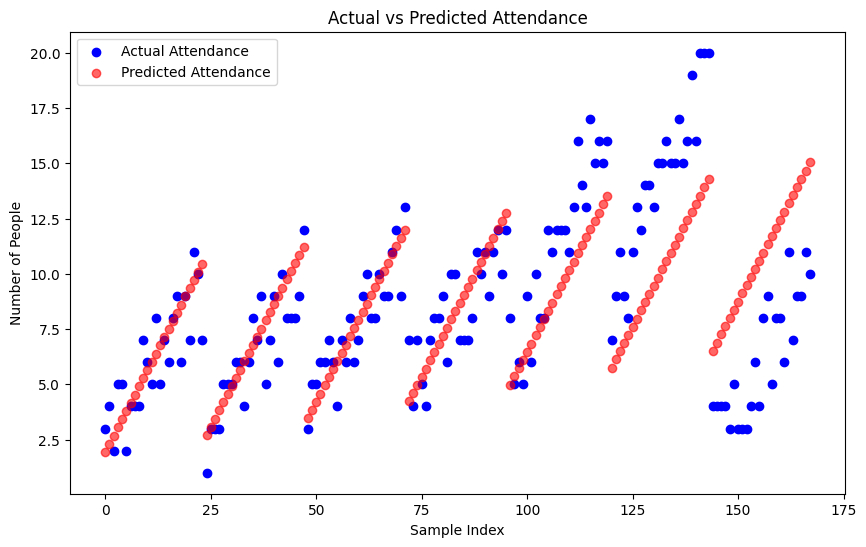

In [123]:
y_pred = prediction

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_train)), y_train, color='blue', label='Actual Attendance')
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted Attendance', alpha=0.6)
plt.title("Actual vs Predicted Attendance")
plt.xlabel("Sample Index")
plt.ylabel("Number of People")
plt.legend()
plt.show()


In [137]:
def predict(time, day):
    return str((time * w[0] + day * w[1] + b)//1) + " people are using the bathroom "
    

In [139]:
predict(11, 3)

'8.0 people are using the bathroom '